# This script demonstrates the k-means algorithm
# Name : Sunjun Hwang
# Student ID : 20151766
# github link : https://github.com/tjswns494/Mathematical-Foundations-for-Computer-Vision-and-Machine-Learning-assignment.git

# import packages for plotting images and manipulating data:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

# define variable

In [2]:
file_data   = "mnist_test.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

# normalize the values of the input data to be [0, 1]

In [3]:
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

# define the distance between two vectors

In [4]:
def computeDistance(x, y):
    distance=0
    for i in range(0,len(x),1):
        distance+=math.pow(x[i]-y[i],2)
    return distance

# define the center point of each clusters

In [5]:
def computeCentroid(list_image,kmeans_label,cluster_num):
    labelnum=[0 for cols in range(cluster_num)]
    centroid=np.zeros((cluster_num,size_row*size_col),dtype=float)

    for i in range(0,len(list_image),1):
        centroid[kmeans_label[i][0]]+=list_image[i]
        labelnum[kmeans_label[i][0]]+=1
    for i in range(0,cluster_num,1):
            if(labelnum[i]==0):
                for j in range(0,len(centroid[0]),1):
                    centroid[i][j]=0
            else:
                centroid[i]=centroid[i]/labelnum[i]
    return centroid

# define the initial label to each vectors

In [6]:
def initialiseLabel(kmeans_label,cluster_num):
    randomnum=[0 for cols in range(len(kmeans_label))]
    for i in range(0,len(kmeans_label),1):
        randomnum[i]=i%cluster_num
    random.shuffle(randomnum)
    for i in range(0,len(kmeans_label),1):
        kmeans_label[i][0]=randomnum[i]
    return kmeans_label

# define the label to given images

In [7]:
def assignLabel(list_image,centroid,kmeans_label):

    distance=0
    for i in range(0,len(kmeans_label),1):
        for j in range(0,len(centroid),1):
            distance=computeDistance(centroid[j],list_image[i])
            if(j==0):
                min=distance
                kmeans_label[i][0]=0
            elif(min>distance):
                min=distance
                kmeans_label[i][0]=j
        kmeans_label[i][1]=min
    return kmeans_label

# define the energy for each clusters

In [8]:
def computeEnergy(kmeans_label,cluster_num):
    energy=0
    for i in range(0,len(kmeans_label),1):
        energy+=kmeans_label[i][1]
    energy/=cluster_num
    return energy

# define the accuracy

In [9]:
def computeAccuracy(kmeans_label,list_label,cluster_num):
    accuracy=0
    label_table=np.zeros((cluster_num,10),dtype=int)
    for i in range(0,len(kmeans_label),1):
        label_table[kmeans_label[i][0]][list_label[i]]+=1
    for i in range(0,cluster_num,1):
        num=0
        for j in range(0,10,1):
            num+=label_table[i][j]
            if(j==0):
                max=label_table[i][j]
            elif(max<label_table[i][j]):
                max=label_table[i][j]
        accuracy+=(max/num)
    accuracy/=cluster_num
    return accuracy

# make a matrix each column of which represents an images in a vector form 

In [10]:
cluster_num=2
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)
kmeans_label  = np.empty((num_image,2), dtype=int)
centroid=np.zeros((cluster_num,size_row*size_col),dtype=float)
im_average  = np.zeros((size_row * size_col, 10), dtype=float)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label[count]       = label
    list_image[:, count]    = im_vector    

    count += 1

# visualize initial centroid images

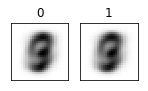

In [11]:
kmeans_label=initialiseLabel(kmeans_label,cluster_num)
centroid=computeCentroid(list_image.T,kmeans_label,cluster_num)
for i in range(cluster_num):
    
    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(centroid.T[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None') 

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

# calculate energy until ex-energy and current energy is equal

In [12]:
num=0
energy=0
exenergy=-1
accuracy_table=np.zeros(10,dtype=float)
energy_table=np.zeros(10,dtype=float)
while energy!=exenergy:  
#for i in range(0,10,1):
    kmeans_label=assignLabel(list_image.T,centroid,kmeans_label)
    energy_table[i]=computeEnergy(kmeans_label,cluster_num)
    exenergy=energy
    energy=energy_table[i]
    accuracy_table[i]=computeAccuracy(kmeans_label,list_label,cluster_num)
    centroid=computeCentroid(list_image.T,kmeans_label,cluster_num)
    num+=1

# visualize energy per iteration

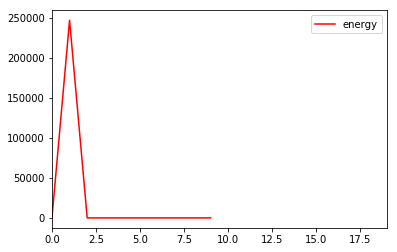

In [13]:
plt.figure()
plt.xlim(0,num-1)
plt.plot(energy_table,color='r',label='energy')
plt.legend()
plt.show()

asdf

# visualize Accuracy per iteration

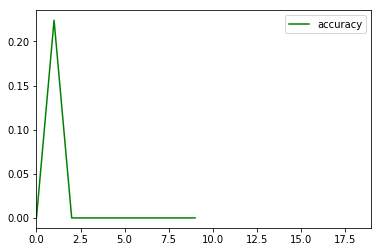

In [14]:
plt.figure()
plt.xlim(0,num-1)
plt.plot(accuracy_table,color='g',label='accuracy')
plt.legend()
plt.show()

# visualize final centroid image

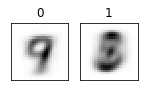

In [15]:
for i in range(cluster_num):
    
    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(centroid.T[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None') 

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()